<a href="https://colab.research.google.com/github/ummd/ummd.github.io/blob/master/Teaching/Lecture2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code 2B - The Bayes Error Rate

These examples will give intuition for the Bayes Error Rate. The Bayes Error Rate calculates how often we would make an error in prediction even if we knew the true probability and predicted optimally.

What does it mean to predict optimally?

The Bayes optimal prediction is to predict the class with the largest estimated probability. In these examples, we will assume we know the true probability, so don't have to estimate it.

## Bayes Error Rate for a single Binary Outcome

Suppose the true probability of a "1" was 0.51. Then the probability of a "0" is 0.49. The Bayes optimal prediction is to predict a "1" **all of the time** because it is the class with highest probability (0.51>0.49).

 Let's see why. If we predict a "1" with probability 1, how often are we wrong?

The answer is 0.49.


In [ ]:
n <- 10000000
p <- 0.51
y <- rbinom(n,1,p) #draw a test sample
mean(y != 1) #always predict a 1 since p>0.5 (this assumes we know p)

[1] 0.490367

Suppose we thought we knew better than Bayes, and predicted a "1" with probablity 0.51 (this is the true probability, after all!). How often are we wrong?

(0.51)*(0.49) + (0.49)(0.51)

This number is larger than 0.49, so we will make more errors

In [ ]:
0.51*0.49 + 0.49*0.51

#verify with a simulation just in case
n <- 10000000
p <- 0.51
y <- rbinom(n,1,p)  #draw a test sample
yh2 <- rbinom(n,1,p) #instead of Bayes Optimal predictor, lets predict a 1 with probability p (this assumes we know p)
mean(y != yh2)

[1] 0.4998

[1] 0.4995901

If we repeat this same exercise when the true probablity is 0.9, disregarding the Bayes prediction gets even worse!

In [ ]:
0.9*0.1 + 0.1*0.9

n <- 10000000
p <- 0.9
y <- rbinom(n,1,p)  #draw a test sample
yh2 <- rbinom(n,1,p) #instead of Bayes Optimal predictor, lets predict a 1 with probability p (this assumes we know p)
mean(y != yh2)

[1] 0.18

[1] 0.180099

This is higher than if we would just predict a "1" all of the time (since our error rate would be .1)

## Bayes Error Rate for when the probability depends on a predictor

Suppose the probability depends on some variable $X$. Let's calculate the Bayes error rate. The Bayes error rate is calculated by repeating the exercise above for all values of X and averaging the errors.

The true DGP generates binary data with the probability given by the black line below

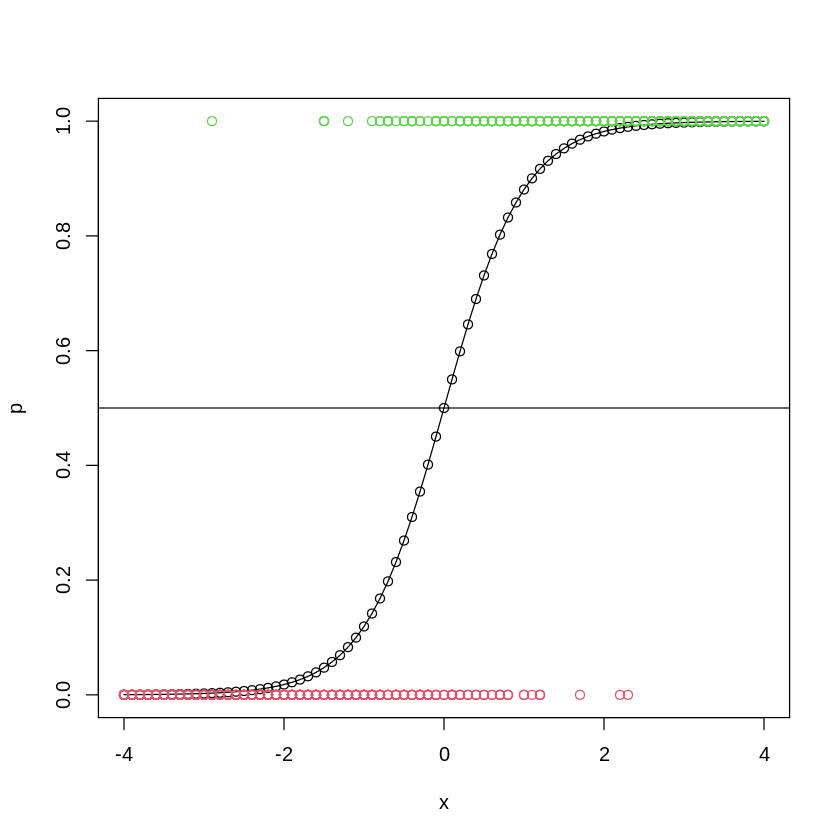

In [12]:
x <- seq(-4,4, by=0.1)

b1 <- 2

p <- exp(b1*x)/(1+exp(b1*x))

plot(x,p)
lines(x,p,col='black')


n <- 810
y <- rbinom(n,1,rep(p,10))
points(rep(x,10),y,col=y+2)
abline(h=0.5)

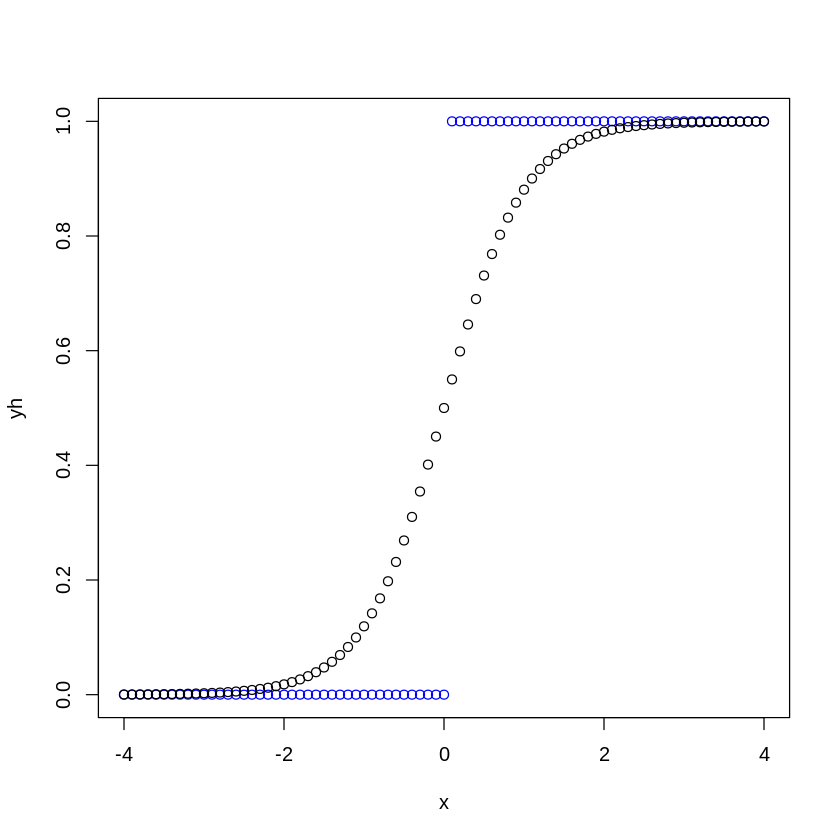

In [14]:
yh <- p>0.5 #the bayes optimal predictor is to always predict the class with the largest probability. For a binary variable, this cutoff is 0.5.
plot(x,yh,col='blue') # this is a visualization of the Bayes optimal prediction
points(x,p,col='black')

How many errors will we make, assuming we knew the true model?

We can calculate this by adding up the errors that the prediction makes compared the observed data. The error rate is therefore the average prediction errors over all the data. As the dataset gets large, this is equivalent to the average difference between the prediction and the true probability over all $x$.

In [15]:
error_rate <- mean(y!=yh)
error_rate

[1] 0.09382716

Now let's repeat, but with a true model that has more variability. This means the true probaility is "flatter" than before. So at each x, the true probability will be further from our prediction (either 0 or 1).

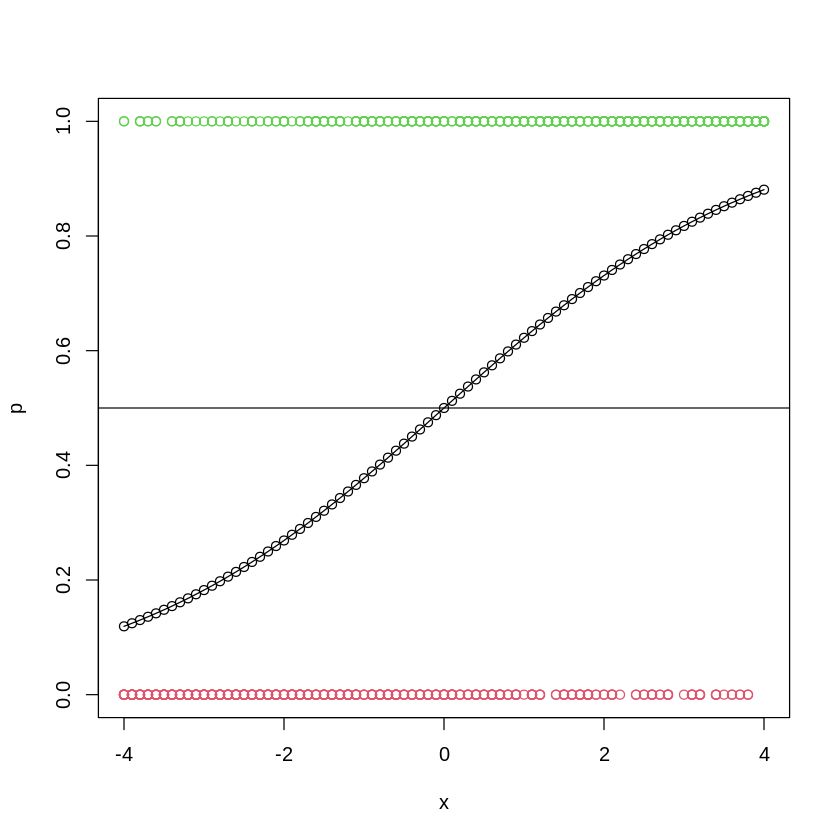

In [ ]:
b1 <- .5

p <- exp(b1*x)/(1+exp(b1*x))

plot(x,p,ylim=c(0,1))
lines(x,p,col='black')

n <- 810
y <- rbinom(n,1,rep(p,10))
points(rep(x,10),y,col=y+2)
abline(h=0.5)

In [ ]:
yh <- p>0.5 #use the Bayes Optimal predictor
error_rate <- mean(y!=yh)
error_rate

[1] 0.2851852

Because there is more variability in the true DGP (the probabity curve is flatter), we will make more errors, even if we knew the true model.

## Why is the Bayes Optimal Predictor Optimal?

What if we used a different prediction method? Suppose instead of the Bayes Optimal predictor, we randomized our prediction according to our predicted probability? Here, we will even assume that we know the true probability!

In [ ]:
yh2 <- rbinom(n,1,p) #predict a "1" with probability p (assuming we even know the true probability!)
error_rate <- mean(y!=yh2)
error_rate

[1] 0.3950617

Whoa, that is way worse. Turns out that this guy Bayes knew something!